Time taken to run the GA :  0.04037141799926758
Parameters of the best solution : [0.37973209 0.3716378  0.99411481 0.99242845 0.02036846 0.09429867]
Fitness value of the best solution = 2.8341451764800754
Number of generations passed is 60


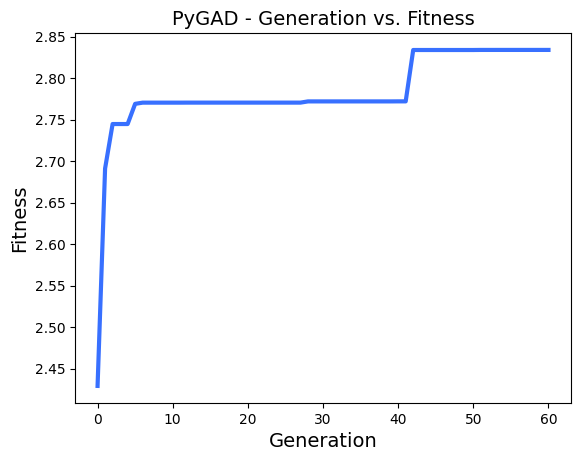

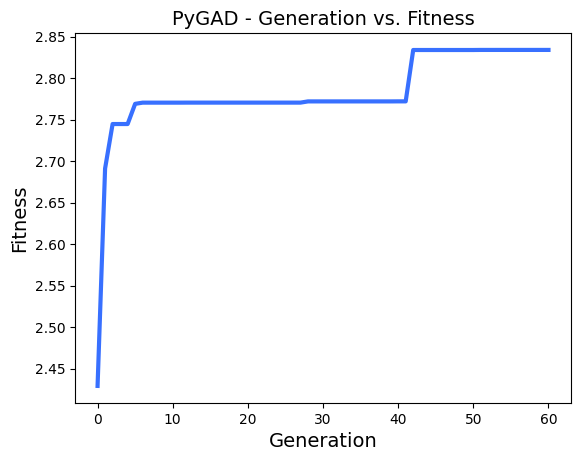

In [6]:
import pygad
import numpy
import time
import math

𝐴 = [0.09, 0.06, 0.99, 0.98, 0.1, 0.15]

#definiujemy parametry chromosomu
#geny to liczby: od 0 do 1
gene_space = {'low': 0, 'high': 1}

def endurance(x, y, z, u, v, w):
 return math.exp(-2*(y-math.sin(x))**2)+math.sin(z*u)+math.cos(v*w)

#definiujemy funkcję fitness
def fitness_func(solution, solution_idx):
    fitness = endurance(solution[0], solution[1], solution[2], solution[3], solution[4], solution[5])
    return fitness

fitness_function = fitness_func

#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 6
num_genes = len(A)

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 3
num_generations = 60
keep_parents = 3

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 15

#inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

#uruchomienie algorytmu
start = time.time()
ga_instance.run()
end = time.time()
print("Time taken to run the GA : ", end-start)

#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Number of generations passed is {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
prediction = numpy.sum(solution)
# print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()
